In [1]:
# Parameters
global_seed = 88
save_results = True
benchmark_settings = {"benchmark_name": "pMNIST_via_torch", "difficulty": "standard", "num_tasks": 3, "train_percentage": 0.8, "num_val_benchmarks": 10, "batch_size": 128}
method_settings = {"method_name": "GroHess", "grow_from": "output", "hessian_percentile": 98, "grad_percentile": 98, "num_inputs": 784, "num_hidden_root": 200, "num_outputs": 10, "loss_name": "CE", "optimizer_name": "Adam"}
HPO_settings = {"HPO_name": "greedy_HPO", "n_trials": 20, "lr": [1e-05, 0.002], "num_epochs": [2, 20]}
visualization_settings = {"savefig": True, "visualize_accs_matrix": True, "visualize_avg_acc_curve": True, "visualize_best_params": True, "visualize_val_accs_matrix": True, "visualize_accuracy_through_benchmarks": True, "visualize_violin": True}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_visualization.ipynb executed_visualization.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 10,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 5,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 2),
                #"ewc_lambda" : (400,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import load

In [4]:
test_accs_matrix, best_params_list, val_accs_matrix = load(HPO_settings, method_settings, benchmark_settings)

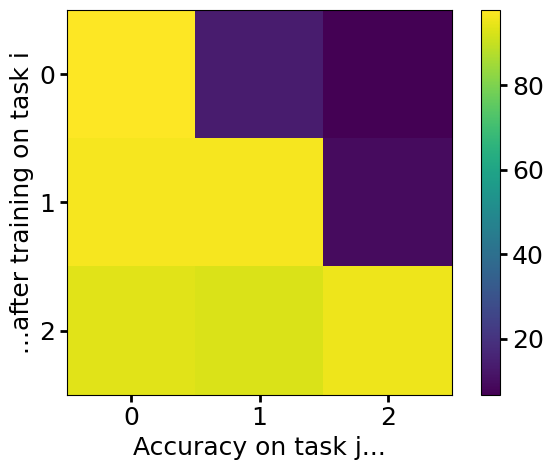

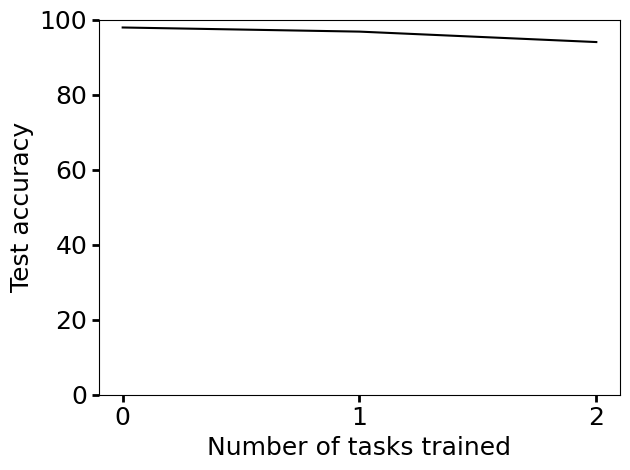

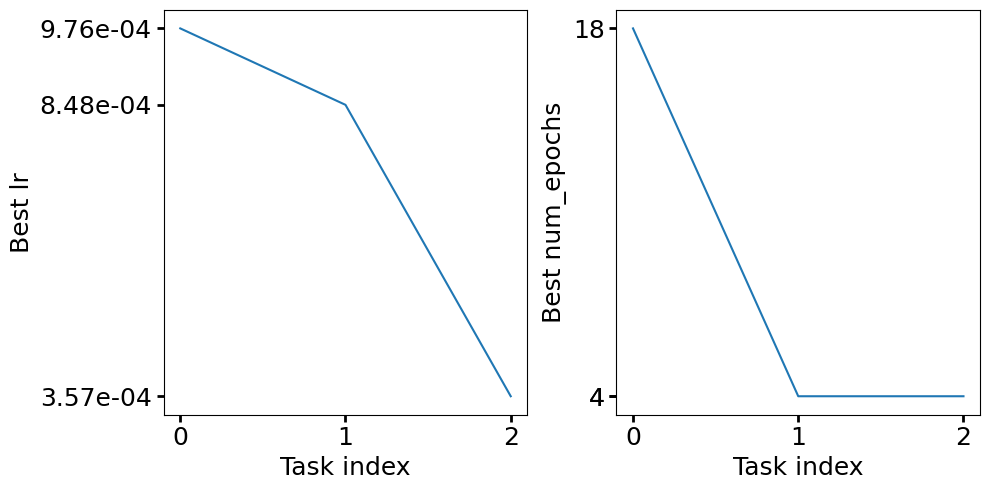

In [5]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

/home/mathis/Master-Thesis-1/Workspace/Core work/HPO_lib/visualize.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


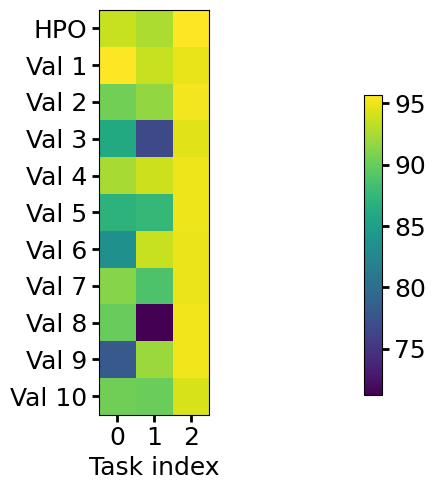

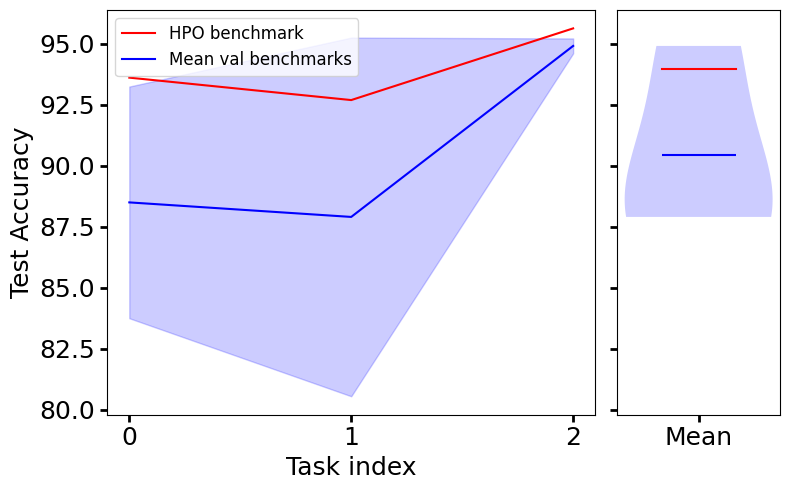

In [6]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)